${\Huge \textrm{EVA_DMBEM}}$

# Weather Data

In this section Weather Data will be uploaded and analyzed to obtain the relevant inputs from the outside enviroment on the building. In particular the data extracted are:

* External Temperature variation.
* Solar Radiation.



## Read Data

In [1]:
from dm4bem import read_epw, sol_rad_tilt_surf
import numpy as np
import pandas as pd

filename = 'CHE_VS_Zermatt.067480_TMYx.2004-2018.epw'

In [2]:
[data, meta] = read_epw(filename, coerce_year=None)
month_year = data['month'].astype(str) + '-' + data['year'].astype(str)
print(f"Months - years in the dataset: {sorted(set(month_year))}")

Months - years in the dataset: ['1-2012', '10-2008', '11-2012', '12-2007', '2-2015', '3-2007', '4-2017', '5-2006', '6-2015', '7-2016', '8-2013', '9-2013']


In [3]:
weather_data = data[["temp_air", "dir_n_rad", "dif_h_rad"]]
weather_data.index = weather_data.index.map(lambda t: t.replace(year=2012))

In [4]:
start_date = '2012-1-1'
end_date = '2012-2-1'

weather_data = weather_data[(weather_data.index >= start_date) & (
    weather_data.index < end_date)]
del data

<AxesSubplot:>

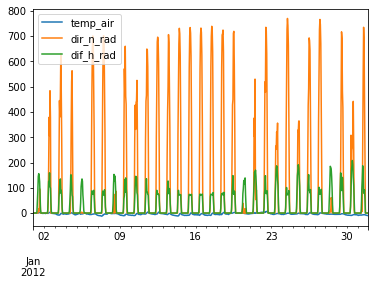

In [5]:
weather_data.plot()

## Solar Radiation Analysis

### Horizontal Walls

In [6]:
albedo_ground = 0.2
albedo_snow = 0.9
albedo = 0.9*albedo_snow + 0.1*albedo_ground


* North Wall

<AxesSubplot:>

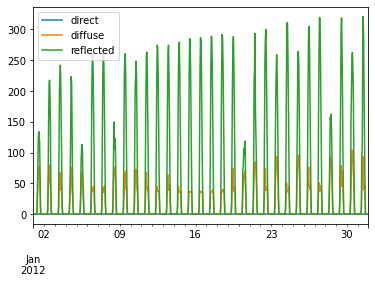

In [7]:
surface_orientation_N = {'slope': 90,
                       'azimuth': 180,
                       'latitude': 46}

rad_surf_N = sol_rad_tilt_surf(
    weather_data, surface_orientation_N, albedo)

rad_surf_N.plot()



<AxesSubplot:>

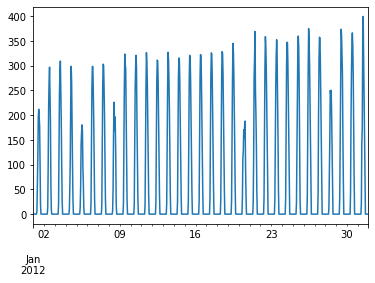

In [8]:
B = surface_orientation_N['slope']
Z = surface_orientation_N['azimuth']
L = surface_orientation_N['latitude']

# Transform degrees in radians
B = B * np.pi / 180
Z = Z * np.pi / 180
L = L * np.pi / 180

n = weather_data.index.dayofyear

declination_angle = 23.45 * np.sin(360 * (284 + n) / 365 * np.pi / 180)
d = declination_angle * np.pi / 180

hour = weather_data.index.hour
minute = weather_data.index.minute + 60
hour_angle = 15 * ((hour + minute / 60) - 12)
h = hour_angle * np.pi / 180

theta = np.sin(d) * np.sin(L) * np.cos(B)
theta -= np.sin(d) * np.cos(L) * np.sin(B) * np.cos(Z)
theta += np.cos(d) * np.cos(L) * np.cos(B) * np.cos(h)
theta += np.cos(d) * np.sin(L) * np.sin(B) * np.cos(Z) * np.cos(h)
theta += np.cos(d) * np.sin(B) * np.sin(Z) * np.sin(h)
theta = np.array(np.arccos(theta))
theta[theta > (np.pi / 2)] = np.pi / 2

dir_rad = weather_data["dir_n_rad"] * np.cos(theta)
dir_rad[dir_rad < 0] = 0

dif_rad = weather_data["dif_h_rad"] * (1 + np.cos(B)) / 2

gamma = np.cos(d) * np.cos(L) * np.cos(h)
gamma += np.sin(d) * np.sin(L)
gamma = np.array(np.arcsin(gamma))
gamma[gamma < 1e-5] = 1e-5

dir_h_rad = weather_data["dir_n_rad"] * np.sin(gamma)

ref_rad = (dir_h_rad + weather_data["dif_h_rad"]) * albedo
ref_rad *= (1 - np.cos(B) / 2)

tot_rad_N = ref_rad + dif_rad + dir_rad
tot_rad_N.plot()

* East Wall

<AxesSubplot:>

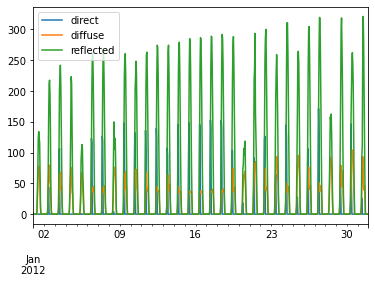

In [9]:
surface_orientation_E = {'slope': 90,
                       'azimuth': -90,
                       'latitude': 46}

rad_surf_E = sol_rad_tilt_surf(
    weather_data, surface_orientation_E, albedo)

rad_surf_E.plot()

<AxesSubplot:>

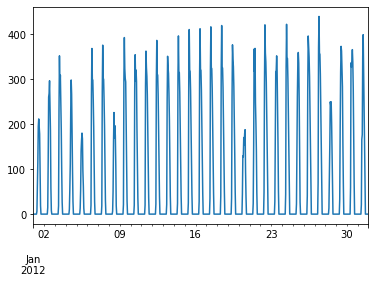

In [10]:
B = surface_orientation_E['slope']
Z = surface_orientation_E['azimuth']
L = surface_orientation_E['latitude']

# Transform degrees in radians
B = B * np.pi / 180
Z = Z * np.pi / 180
L = L * np.pi / 180

n = weather_data.index.dayofyear

declination_angle = 23.45 * np.sin(360 * (284 + n) / 365 * np.pi / 180)
d = declination_angle * np.pi / 180

hour = weather_data.index.hour
minute = weather_data.index.minute + 60
hour_angle = 15 * ((hour + minute / 60) - 12)
h = hour_angle * np.pi / 180

theta = np.sin(d) * np.sin(L) * np.cos(B)
theta -= np.sin(d) * np.cos(L) * np.sin(B) * np.cos(Z)
theta += np.cos(d) * np.cos(L) * np.cos(B) * np.cos(h)
theta += np.cos(d) * np.sin(L) * np.sin(B) * np.cos(Z) * np.cos(h)
theta += np.cos(d) * np.sin(B) * np.sin(Z) * np.sin(h)
theta = np.array(np.arccos(theta))
theta[theta > (np.pi / 2)] = np.pi / 2

dir_rad = weather_data["dir_n_rad"] * np.cos(theta)
dir_rad[dir_rad < 0] = 0

dif_rad = weather_data["dif_h_rad"] * (1 + np.cos(B)) / 2

gamma = np.cos(d) * np.cos(L) * np.cos(h)
gamma += np.sin(d) * np.sin(L)
gamma = np.array(np.arcsin(gamma))
gamma[gamma < 1e-5] = 1e-5

dir_h_rad = weather_data["dir_n_rad"] * np.sin(gamma)

ref_rad = (dir_h_rad + weather_data["dif_h_rad"]) * albedo
ref_rad *= (1 - np.cos(B) / 2)

tot_rad_E = ref_rad + dif_rad + dir_rad
tot_rad_E.plot()

* South Wall

<AxesSubplot:>

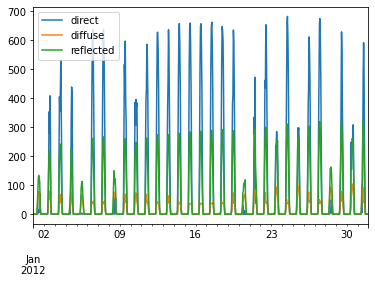

In [11]:
surface_orientation_S = {'slope': 90,
                       'azimuth': 0,
                       'latitude': 46}

rad_surf_S = sol_rad_tilt_surf(
    weather_data, surface_orientation_S, albedo)

rad_surf_S.plot()

<AxesSubplot:>

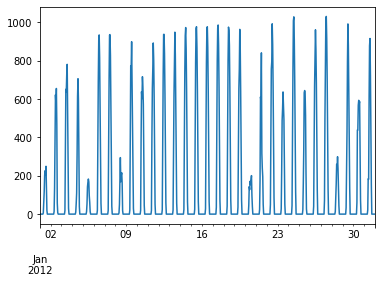

In [12]:
B = surface_orientation_S['slope']
Z = surface_orientation_S['azimuth']
L = surface_orientation_S['latitude']

# Transform degrees in radians
B = B * np.pi / 180
Z = Z * np.pi / 180
L = L * np.pi / 180

n = weather_data.index.dayofyear

declination_angle = 23.45 * np.sin(360 * (284 + n) / 365 * np.pi / 180)
d = declination_angle * np.pi / 180

hour = weather_data.index.hour
minute = weather_data.index.minute + 60
hour_angle = 15 * ((hour + minute / 60) - 12)
h = hour_angle * np.pi / 180

theta = np.sin(d) * np.sin(L) * np.cos(B)
theta -= np.sin(d) * np.cos(L) * np.sin(B) * np.cos(Z)
theta += np.cos(d) * np.cos(L) * np.cos(B) * np.cos(h)
theta += np.cos(d) * np.sin(L) * np.sin(B) * np.cos(Z) * np.cos(h)
theta += np.cos(d) * np.sin(B) * np.sin(Z) * np.sin(h)
theta = np.array(np.arccos(theta))
theta[theta > (np.pi / 2)] = np.pi / 2

dir_rad = weather_data["dir_n_rad"] * np.cos(theta)
dir_rad[dir_rad < 0] = 0

dif_rad = weather_data["dif_h_rad"] * (1 + np.cos(B)) / 2

gamma = np.cos(d) * np.cos(L) * np.cos(h)
gamma += np.sin(d) * np.sin(L)
gamma = np.array(np.arcsin(gamma))
gamma[gamma < 1e-5] = 1e-5

dir_h_rad = weather_data["dir_n_rad"] * np.sin(gamma)

ref_rad = (dir_h_rad + weather_data["dif_h_rad"]) * albedo
ref_rad *= (1 - np.cos(B) / 2)

tot_rad_S = ref_rad + dif_rad + dir_rad
tot_rad_S.plot()

* West Wall

<AxesSubplot:>

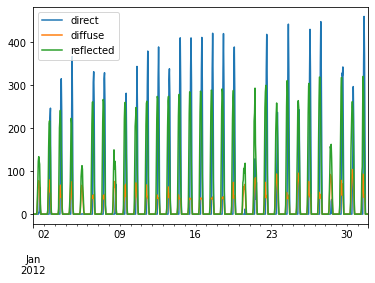

In [13]:
surface_orientation_W = {'slope': 90,
                       'azimuth': 90,
                       'latitude': 46}

rad_surf_W = sol_rad_tilt_surf(
    weather_data, surface_orientation_W, albedo)

rad_surf_W.plot()

<AxesSubplot:>

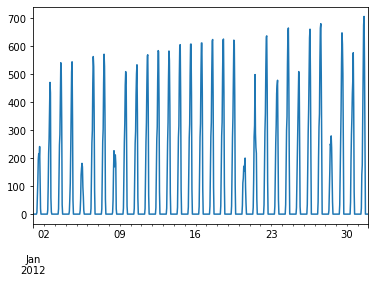

In [14]:
B = surface_orientation_W['slope']
Z = surface_orientation_W['azimuth']
L = surface_orientation_W['latitude']

# Transform degrees in radians
B = B * np.pi / 180
Z = Z * np.pi / 180
L = L * np.pi / 180

n = weather_data.index.dayofyear

declination_angle = 23.45 * np.sin(360 * (284 + n) / 365 * np.pi / 180)
d = declination_angle * np.pi / 180

hour = weather_data.index.hour
minute = weather_data.index.minute + 60
hour_angle = 15 * ((hour + minute / 60) - 12)
h = hour_angle * np.pi / 180

theta = np.sin(d) * np.sin(L) * np.cos(B)
theta -= np.sin(d) * np.cos(L) * np.sin(B) * np.cos(Z)
theta += np.cos(d) * np.cos(L) * np.cos(B) * np.cos(h)
theta += np.cos(d) * np.sin(L) * np.sin(B) * np.cos(Z) * np.cos(h)
theta += np.cos(d) * np.sin(B) * np.sin(Z) * np.sin(h)
theta = np.array(np.arccos(theta))
theta[theta > (np.pi / 2)] = np.pi / 2

dir_rad = weather_data["dir_n_rad"] * np.cos(theta)
dir_rad[dir_rad < 0] = 0

dif_rad = weather_data["dif_h_rad"] * (1 + np.cos(B)) / 2

gamma = np.cos(d) * np.cos(L) * np.cos(h)
gamma += np.sin(d) * np.sin(L)
gamma = np.array(np.arcsin(gamma))
gamma[gamma < 1e-5] = 1e-5

dir_h_rad = weather_data["dir_n_rad"] * np.sin(gamma)

ref_rad = (dir_h_rad + weather_data["dif_h_rad"]) * albedo
ref_rad *= (1 - np.cos(B) / 2)

tot_rad_W = ref_rad + dif_rad + dir_rad
tot_rad_W.plot()

### Tilted Roof Wall

* East Roof Wall

<AxesSubplot:>

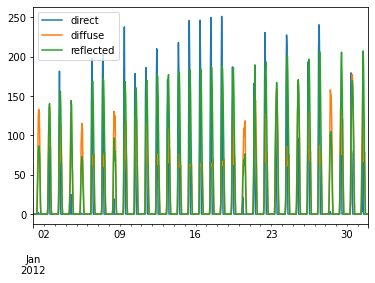

In [15]:
surface_orientation_RE = {'slope': 45,
                       'azimuth': -90,
                       'latitude': 46}

rad_surf_RE = sol_rad_tilt_surf(
    weather_data, surface_orientation_RE, albedo)

rad_surf_RE.plot()

<AxesSubplot:>

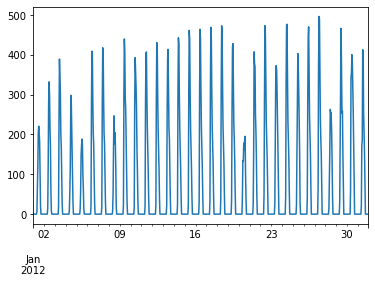

In [16]:
B = surface_orientation_RE['slope']
Z = surface_orientation_RE['azimuth']
L = surface_orientation_RE['latitude']

# Transform degrees in radians
B = B * np.pi / 180
Z = Z * np.pi / 180
L = L * np.pi / 180

n = weather_data.index.dayofyear

declination_angle = 23.45 * np.sin(360 * (284 + n) / 365 * np.pi / 180)
d = declination_angle * np.pi / 180

hour = weather_data.index.hour
minute = weather_data.index.minute + 60
hour_angle = 15 * ((hour + minute / 60) - 12)
h = hour_angle * np.pi / 180

theta = np.sin(d) * np.sin(L) * np.cos(B)
theta -= np.sin(d) * np.cos(L) * np.sin(B) * np.cos(Z)
theta += np.cos(d) * np.cos(L) * np.cos(B) * np.cos(h)
theta += np.cos(d) * np.sin(L) * np.sin(B) * np.cos(Z) * np.cos(h)
theta += np.cos(d) * np.sin(B) * np.sin(Z) * np.sin(h)
theta = np.array(np.arccos(theta))
theta[theta > (np.pi / 2)] = np.pi / 2

dir_rad = weather_data["dir_n_rad"] * np.cos(theta)
dir_rad[dir_rad < 0] = 0

dif_rad = weather_data["dif_h_rad"] * (1 + np.cos(B)) / 2

gamma = np.cos(d) * np.cos(L) * np.cos(h)
gamma += np.sin(d) * np.sin(L)
gamma = np.array(np.arcsin(gamma))
gamma[gamma < 1e-5] = 1e-5

dir_h_rad = weather_data["dir_n_rad"] * np.sin(gamma)

ref_rad = (dir_h_rad + weather_data["dif_h_rad"]) * albedo
ref_rad *= (1 - np.cos(B) / 2)

tot_rad_ER = ref_rad + dif_rad + dir_rad
tot_rad_ER.plot()

* West Roof Wall

<AxesSubplot:>

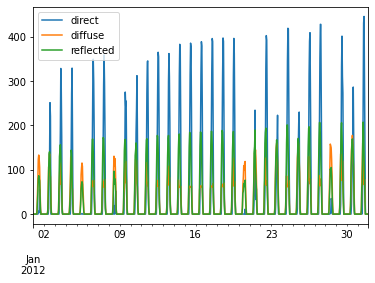

In [17]:
surface_orientation_RW = {'slope': 45,
                       'azimuth': 90,
                       'latitude': 46}

rad_surf_RW = sol_rad_tilt_surf(
    weather_data, surface_orientation_RW, albedo)

rad_surf_RW.plot()

<AxesSubplot:>

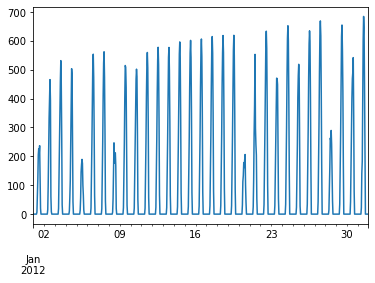

In [18]:
B = surface_orientation_RW['slope']
Z = surface_orientation_RW['azimuth']
L = surface_orientation_RW['latitude']

# Transform degrees in radians
B = B * np.pi / 180
Z = Z * np.pi / 180
L = L * np.pi / 180

n = weather_data.index.dayofyear

declination_angle = 23.45 * np.sin(360 * (284 + n) / 365 * np.pi / 180)
d = declination_angle * np.pi / 180

hour = weather_data.index.hour
minute = weather_data.index.minute + 60
hour_angle = 15 * ((hour + minute / 60) - 12)
h = hour_angle * np.pi / 180

theta = np.sin(d) * np.sin(L) * np.cos(B)
theta -= np.sin(d) * np.cos(L) * np.sin(B) * np.cos(Z)
theta += np.cos(d) * np.cos(L) * np.cos(B) * np.cos(h)
theta += np.cos(d) * np.sin(L) * np.sin(B) * np.cos(Z) * np.cos(h)
theta += np.cos(d) * np.sin(B) * np.sin(Z) * np.sin(h)
theta = np.array(np.arccos(theta))
theta[theta > (np.pi / 2)] = np.pi / 2

dir_rad = weather_data["dir_n_rad"] * np.cos(theta)
dir_rad[dir_rad < 0] = 0

dif_rad = weather_data["dif_h_rad"] * (1 + np.cos(B)) / 2

gamma = np.cos(d) * np.cos(L) * np.cos(h)
gamma += np.sin(d) * np.sin(L)
gamma = np.array(np.arcsin(gamma))
gamma[gamma < 1e-5] = 1e-5

dir_h_rad = weather_data["dir_n_rad"] * np.sin(gamma)

ref_rad = (dir_h_rad + weather_data["dif_h_rad"]) * albedo
ref_rad *= (1 - np.cos(B) / 2)

tot_rad_WR = ref_rad + dif_rad + dir_rad
tot_rad_WR.plot()

### Ground Wall

In [19]:
tot_rad_G = 0;